# <center> <font color='blue'>Matemática Para Data Science</font> </center>

## Sistemas de Equações Lineares

In [60]:
import numpy as np
import sympy

## Resolvendo Sistemas de Equações Lineares com NumPy

Considere o seguinte sistema de equações lineares:

- 2x + 3y = 8
- 4x - 5y = -7

In [61]:
# Array com os elementos na parte esquerda da equação (constantes)
A = np.array([[2, 3], [4, -5]])

In [62]:
# Array com os elementos na parte direita da equação (valores dependentes)
B = np.array([8, -7])

In [63]:
# Solução com a função solve
X = np.linalg.solve(A, B)
print(X)

[0.86363636 2.09090909]


In [64]:
print("Solução do sistema:")
print("x =", X[0])
print("y =", X[1])

Solução do sistema:
x = 0.8636363636363633
y = 2.090909090909091


In [65]:
print(2 * X[0] + 3 * X[1])

7.999999999999999


In [66]:
print(4 * X[0] - 5 * X[1])

-7.0


## Resolvendo Sistemas de Equações Lineares com SymPy

Considere o seguinte sistema de equações lineares:

- 2x + 3y = 8
- 4x - 5y = -7

In [67]:
x, y = sympy.symbols('x y')

In [68]:
eq1 = sympy.Eq(2*x + 3*y, 8)

In [69]:
eq2 = sympy.Eq(4*x - 5*y, -7)

In [70]:
sol = sympy.solve((eq1, eq2), (x, y))

In [71]:
print("Solução do sistema:")
print("x =", sol[x])
print("y =", sol[y])

Solução do sistema:
x = 19/22
y = 23/11


In [72]:
print(2 * sol[x] + 3 * sol[y])

8


In [73]:
print(4 * sol[x] - 5 * sol[y])

-7


## Fórmula da Regressão Linear

Pode se utilizar para a resolução de uma equação de regressão linear o Gradiente Descendente, Minimos Quadrados Ordinarios, Sistema de equações lineares

![DSA](imagens/formula.png)

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# Seed
np.random.seed(0)

In [76]:
# Gerando dados aleatórios para a regressão linear
x = np.random.rand(100)
y = 3 * x + 2 + np.random.randn(100)

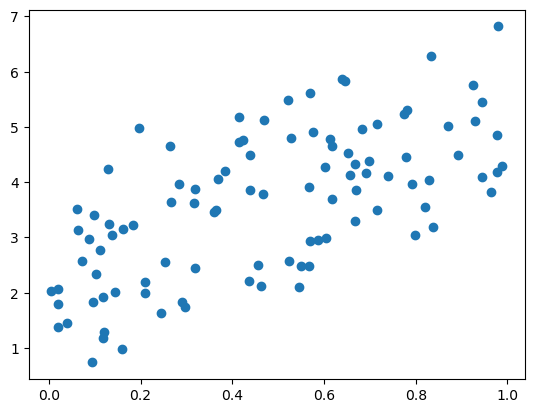

In [77]:
# Plotando os dados de x e y
plt.scatter(x, y)
plt.show()

In [78]:
# Montando o sistema de equações lineares (criando os arrays)
A = np.vstack([x, np.ones(len(x))]).T
b = y

In [79]:
# Resolvendo o sistema de equações lineares
b, a = np.linalg.lstsq(A, b, rcond = None)[0]

In [80]:
print(a)

2.2221510774472293


In [81]:
print(b)

2.936935021402038


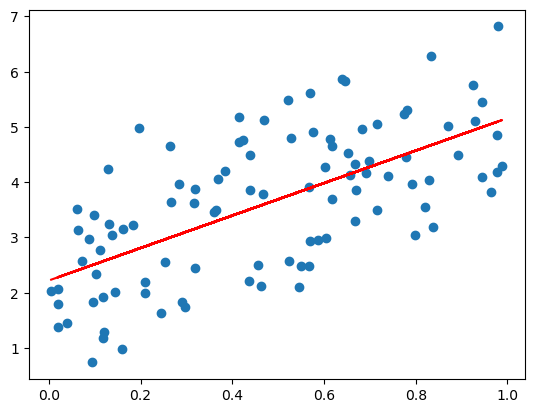

In [82]:
# Plotando os dados e a linha de regressão
plt.scatter(x, y)
plt.plot(x, a + x * b, 'r')
plt.show()

In [83]:
# Prevendo y a partir de um novo valor de x
x = 0.64976338
y = a + x * b
print(y)

4.13046390379379


# Eliminação de Gauss

A ``Eliminação de Gauss`` é um método de **solução de sistemas de equações lineares**, que consiste em, **transformar a matriz dos coeficientes em uma matriz triangular superior ou inferior**, para que o sistema possa ser **resolvido por substituição**.

O método é baseado na **eliminação de incógnitas**, por meio da **combinação linear das equações do sistema**,  em cada etapa do método, uma das incógnitas é eliminada, fazendo com que os coeficientes de uma linha da matriz, dos coeficientes, se anulem em relação à mesma coluna das outras linhas.

A seguir, está a fórmula matemática da ``Eliminação de Gauss`` para **transformar uma matriz dos coeficientes** ``A`` em uma **matriz triangular superior**:

Para cada coluna ``i`` (de 1 a n) da matriz ``A``:

- Selecionar o pivô P na linha i e coluna i: P = A[i, i]
- Para cada linha j (de i+1 a n) abaixo da linha i:
- Calcular o fator de eliminação m: m = A[j, i] / P
- Para cada coluna k (de i a n), subtrair a linha i multiplicada por m da linha j: A[j, k] = A[j, k] - m * A[i, k]
- Atualizar o termo independente b_j: b[j] = b[j] - m * b[i]

Após a eliminação, a **matriz dos coeficientes** ``A`` é **Transformada em uma matriz triangular superior** e o sistema pode ser **resolvido por substituição**. O processo de substituição consiste em calcular a solução para a última incógnita (x_n) e, em seguida, usar essa solução para calcular as outras incógnitas de forma recursiva, da última para a primeira.

### Considere o seguinte sistema de equações lineares:

* 2x + y + z = 5
* 4x - 6y = -2
* -2x + 7y + 2z = 9

In [84]:
# Matrizes para os termos das equações
A = np.array([[2, 1, 1], [4, -6, 0], [-2, 7, 2]])  # matriz dos coeficientes
b = np.array([5, -2, 9])  # vetor de termos independentes

In [85]:
print(A)

[[ 2  1  1]
 [ 4 -6  0]
 [-2  7  2]]


In [86]:
print(b)

[ 5 -2  9]


In [87]:
# Transformando a matriz em uma matriz triangular superior

# Comprimento de b
n = len(b)

# Loop externo
for i in range(n):
    
    # Pivô
    pivot = A[i, i]
    
    # Loop interno
    # Eliminação
    for j in range(i+1, n):
        factor = A[j, i] / pivot
        A[j, i:] = A[j, i:] - factor * A[i, i:]
        b[j] = b[j] - factor * b[i]

In [88]:
# Resolvendo o sistema por substituição
x = np.zeros(n)
for i in range(n-1, -1, -1):
    x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

In [89]:
print('Solução encontrada:', x)

Solução encontrada: [1. 1. 2.]


# Decomposição LU (Lower Upper)

A ``Decomposição LU`` é um método de solução de sistemas de equações lineares que consiste em, **fatorar a matriz dos coeficientes** ``A`` em **duas matrizes, uma triangular inferior** ``L`` e outra **triangular superior** ``U``, de forma que`` A = LU``.

A ``fatoração LU`` pode ser calculada utilizando o método de ``Eliminação de Gauss``, que **transforma a matriz dos coeficientes em uma matriz triangular superior ou inferior**. A matriz ``L`` contém os **fatores de eliminação** usados para **transformar a matriz dos coeficientes em uma matriz triangular**, enquanto a matriz ``U`` é a **matriz triangular resultante da eliminação**.

A fórmula matemática para a ``fatoração LU`` é:

Para cada coluna ``i`` (de 1 a n) da matriz`` A``:

- Selecionar o pivô P na linha i e coluna i: P = A[i, i]
- Para cada linha j (de i+1 a n) abaixo da linha i:
- Calcular o fator de eliminação m: m = A[j, i] / P
- Para cada coluna k (de i a n), subtrair a linha i multiplicada por m da linha j: A[j, k] = A[j, k] - m * A[i, k]
- Atualizar o termo independente b_j: b[j] = b[j] - m * b[i]
- Armazenar o fator de eliminação na matriz L: L[j, i] = m
- A matriz U é a matriz triangular superior resultante da eliminação.

O resultado da ``fatoração LU`` é a matriz`` ``A escrita como o produto de duas matrizes, ``A = LU``, em que ``L`` é uma **matriz triangular inferior com diagonal unitária**, ou seja, com ``1's`` na **diagonal principal** e ``U`` é uma **matriz triangular superior**. A solução do sistema pode ser calculada resolvendo-se dois sistemas de equações lineares triangulares, ``Lc = b e Ux = c``, em que ``c`` é um **vetor auxiliar**.

Note que a ``fatoração LU`` não pode ser aplicada a todas as matrizes, sendo necessário verificar as condições de existência da fatoração, como a não singularidade da matriz`` A`` e a **não existência de pivôs nulos na eliminação**.

### Considere o seguinte sistema de equações lineares:

*  2x + y + z = 5
*  4x - 6y = -2
*  -2x + 7y + 2z = 9

In [90]:
import scipy.linalg as la

In [91]:
# Matrizes para os termos das equações
A = np.array([[2, 1, 1], [4, -6, 0], [-2, 7, 2]])  # matriz dos coeficientes
b = np.array([5, -2, 9])  # vetor de termos independentes

# Fatorando a matriz dos coeficientes em uma matriz triangular inferior e outra superior
P, L, U = la.lu(A)

# Resolvendo o sistema por substituição
y = la.solve_triangular(L, P @ b, lower=True)
x = la.solve_triangular(U, y)

print('Solução encontrada:', x)

Solução encontrada: [1. 1. 2.]


# Método da Matriz Inversa

O ``Método da Matriz Inversa``, é utilizado para resolver sistemas de equações lineares, que consiste em **calcular a inversa da matriz** dos coeficientes e, em seguida, **multiplicar a inversa** pela **matriz dos termos independentes** para obter a solução.

Seja um sistema de equações lineares``Ax = b``, em que ``A`` é a matriz dos coeficientes, ``x`` é o vetor das incógnitas e ``b`` é o **vetor dos termos independentes**. A solução do sistema é dada por ``x = A^-1 * b``, onde`` A^-1`` é a **matriz inversa** de ``A``.

A fórmula matemática para a inversa de uma matriz 2x2 é:

``A^-1 = 1/det(A) * [d(A) -b(A); -c(A) a(A)]``

onde ``det(A)`` é o determinante de **A, a(A), b(A), c(A) e d(A)** são os elementos da matriz ``A``.

Para matrizes maiores do que 2x2, o processo de inversão é mais complexo e geralmente envolve técnicas como a eliminação gaussiana com pivotação parcial.

Assim, o método da matriz inversa consiste em:

- Calcular a matriz inversa de A
- Multiplicar a matriz inversa pela matriz dos termos independentes b para obter a solução x = A^-1 * b.

O método da matriz inversa é computacionalmente caro para sistemas grandes, pois a inversão de uma matriz grande é um processo computacionalmente intensivo. Além disso, nem todas as matrizes têm inversa, tornando esse método inadequado para alguns sistemas.

### Considere o seguinte sistema de equações lineares:

*  2x + y + z = 5
*  4x - 6y = -2
*  -2x + 7y + 2z = 9

In [92]:
# Matrizes para os termos das equações
A = np.array([[2, 1, 1], [4, -6, 0], [-2, 7, 2]])  # matriz dos coeficientes
b = np.array([5, -2, 9])  # vetor de termos independentes

# Calculando a matriz inversa de A
A_inv = np.linalg.inv(A)

# Resolvendo o sistema pela multiplicação da matriz inversa por b
x = A_inv @ b

print('Solução encontrada:', x)

Solução encontrada: [1. 1. 2.]


# Escalonamento de Matrizes

O escalonamento é uma técnica para resolver sistemas de equações lineares que consiste em transformar a matriz dos coeficientes em uma matriz escalonada, que é uma matriz triangular superior ou inferior. É muito similar à Eliminação de Gauss.

O processo de escalonamento envolve a eliminação de incógnitas por meio da combinação linear das equações do sistema. Em cada etapa do processo, uma das incógnitas é eliminada, fazendo com que os coeficientes de uma linha da matriz dos coeficientes se anulem em relação à mesma coluna das outras linhas.

A seguir, estão os passos para a solução de sistemas lineares utilizando escalonamento:

1- Escrever o sistema na forma matricial Ax = b, em que A é a matriz dos coeficientes, x é o vetor das incógnitas e b é o vetor dos termos independentes.


2- Selecionar a primeira incógnita e a primeira equação do sistema. Se o coeficiente dessa incógnita for zero, trocar a linha com outra linha abaixo que tenha um coeficiente diferente de zero nessa coluna.


3- Utilizar a primeira equação para eliminar a primeira incógnita em todas as outras equações abaixo, usando operações elementares em linhas da matriz dos coeficientes.


4- Selecionar a segunda incógnita e a segunda equação abaixo da primeira. Se o coeficiente dessa incógnita for zero, trocar a linha com outra linha abaixo que tenha um coeficiente diferente de zero nessa coluna.


5- Utilizar a segunda equação para eliminar a segunda incógnita em todas as outras equações abaixo, usando operações elementares em linhas da matriz dos coeficientes.


6- Repetir os passos 4 e 5 para cada uma das outras incógnitas, selecionando a próxima incógnita abaixo da anterior.


7- Verificar a existência e a unicidade da solução. Se todas as linhas escalonadas tiverem pelo menos um coeficiente diferente de zero na diagonal principal, o sistema tem solução única. Caso contrário, o sistema pode não ter solução ou ter infinitas soluções.


8- Resolver o sistema triangular superior ou inferior resultante do escalonamento por substituição, começando pela última incógnita e trabalhando em direção à primeira.


O escalonamento é um método eficiente para resolver sistemas de equações lineares, especialmente para sistemas pequenos. No entanto, para sistemas grandes, ele pode ser computacionalmente caro e a eliminação gaussiana é geralmente preferida.

### Considere o seguinte sistema de equações lineares:

*  2x + y + z = 5
*  4x - 6y = -2
*  -2x + 7y + 2z = 9

In [93]:
# Matrizes para os termos das equações
A = np.array([[2, 1, 1], [4, -6, 0], [-2, 7, 2]], dtype=float)  # matriz dos coeficientes
b = np.array([5, -2, 9], dtype=float)  # vetor de termos independentes

# Escalonar a matriz dos coeficientes e o vetor dos termos independentes
n = len(b)
for i in range(n):
    
    # Selecionar a linha com o maior valor absoluto na coluna i
    max_row = i + np.argmax(np.abs(A[i:, i]))
    
    # Trocar a linha atual com a linha com o maior valor absoluto
    A[[i, max_row]] = A[[max_row, i]]
    b[[i, max_row]] = b[[max_row, i]]
    
    # Eliminar a incógnita i nas equações abaixo
    for j in range(i+1, n):
        factor = A[j, i] / A[i, i]
        A[j, i:] -= factor * A[i, i:]
        b[j] -= factor * b[i]

# Verificar a existência e a unicidade da solução
if np.any(np.diag(A) == 0):
    print('Sistema não tem solução única')
else:
    # Resolver o sistema triangular superior resultante
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    print('Solução encontrada:', x)

Solução encontrada: [1. 1. 2.]


# Método de Jacobi

O Método de Jacobi é um método iterativo para resolver sistemas de equações lineares. Ele consiste em iterar por um número fixo de vezes até que a solução converja. Em cada iteração, as incógnitas são atualizadas com base em uma fórmula específica que depende dos coeficientes do sistema.

A fórmula matemática do Método de Jacobi é:

- Para cada incógnita x_i (de 1 a n) do sistema:

- Inicializar as incógnitas com um valor inicial x_i^0

- Para cada iteração k (de 1 a N), atualizar cada incógnita x_i^k+1 com a seguinte fórmula:

x_i^k+1 = (b_i - Sum(A_ij * x_j^k, j=1 to n, j!=i)) / A_ii

onde b é o vetor de termos independentes e A é a matriz dos coeficientes.

O processo iterativo deve ser repetido até que a solução convirja para um valor aceitável, ou até que um número máximo de iterações seja atingido.

A fórmula acima indica que a atualização de cada incógnita x_i depende dos valores atuais das outras incógnitas x_j. Essa dependência entre as incógnitas é o que torna o método iterativo.

O Método de Jacobi converge para uma solução se a matriz dos coeficientes A for diagonalmente dominante, ou seja, se o módulo do elemento na diagonal principal for maior do que a soma dos módulos dos outros elementos da mesma linha. Além disso, a convergência também depende do valor inicial das incógnitas e do número de iterações.

### Considere o seguinte sistema de equações lineares:

*  2x + y + z = 5
*  4x - 6y = -2
*  -2x + 7y + 2z = 9

In [94]:
# Definir o sistema de equações lineares na forma Ax = b
A = np.array([[10, 1, 1], [2, -10, 3], [1, 3, 10]])
b = np.array([12, -5, 15])

# Definir o número máximo de iterações e a tolerância para convergência
max_iter = 100
tolerance = 1e-6

# Definir a matriz de iterações do método de Jacobi
n = len(b)
x = np.zeros(n)
x_next = np.zeros(n)

# Executar o método de Jacobi
for k in range(max_iter):
    
    for i in range(n):
        x_next[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    
    # Verificar a convergência
    if np.linalg.norm(x_next - x) < tolerance:
        break
    x[:] = x_next

# Imprimir a solução encontrada
print('Solução encontrada:', x)

Solução encontrada: [0.98808419 1.02566477 1.093492  ]
